In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline 

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import uproot # 4

In [57]:
file_name = '../CMSSW_12_5_0_pre4/src/L1Trigger/L1THGCalUtilities/test/ntuple_RelValSingleEFlatPt2To100_2026D88noPU.root'
tree_name = 'hgcalTriggerNtuplizer/HGCalTriggerNtuple'
branches_gen=['event','genpart_pid','genpart_exphi', 'genpart_exeta','genpart_gen',
        'genpart_reachedEE', 'genpart_pt', 'genpart_energy']
branches_cl3d=['event', 'cl3d_pt','cl3d_eta','cl3d_phi']
branches_tc = ['event', 'tc_pt', 'tc_mipPt', 'tc_eta', 'tc_phi', 'tc_layer']

In [58]:
tree = uproot.open(file_name)[tree_name]
df_gen = tree.arrays(branches_gen, library='pd')
df_cl = tree.arrays(branches_cl3d, library='pd')
df_tc = tree.arrays(branches_tc, library='pd')

In [59]:
sel = df_gen['genpart_gen']!=-1
df_gen = df_gen[sel]
sel = df_gen['genpart_reachedEE']==2
df_gen = df_gen[sel]
sel = df_gen['genpart_pt']>20
df_gen = df_gen[sel]
sel = np.abs(df_gen['genpart_exeta'])>1.6
df_gen = df_gen[sel]
sel = np.abs(df_gen['genpart_exeta'])<2.9
df_gen = df_gen[sel]
df_gen_pos = df_gen[df_gen['genpart_exeta']>0]
df_gen_neg = df_gen[df_gen['genpart_exeta']<0]
df_gen_pos.set_index('event', inplace=True)
df_gen_neg.set_index('event', inplace=True)

In [68]:
df_cl_pos = df_cl[df_cl['cl3d_eta']>0]
df_cl_neg = df_cl[df_cl['cl3d_eta']<0]
df_cl_pos.set_index('event', inplace=True)
df_cl_neg.set_index('event', inplace=True)

sel = df_tc['tc_layer']<28
df_tc = df_tc[sel]
df_tc_pos = df_tc[df_tc['tc_eta']>0]
df_tc_neg = df_tc[df_tc['tc_eta']<0]
df_tc_pos.set_index('event', inplace=True)
df_tc_neg.set_index('event', inplace=True)

In [69]:
df_pos = df_gen_pos.join(df_cl_pos, how='left', rsuffix='_cl')
df_neg = df_gen_neg.join(df_cl_neg, how='left', rsuffix='_cl')
df_pos = df_pos.join(df_tc_pos, how='left', rsuffix='_cl')
df_neg = df_neg.join(df_tc_neg, how='left', rsuffix='_cl')

In [70]:
df_pos

,genpart_pid,genpart_exphi,genpart_exeta,genpart_gen,genpart_reachedEE,genpart_pt,genpart_energy,cl3d_pt,cl3d_eta,cl3d_phi,tc_pt,tc_mipPt,tc_eta,tc_phi,tc_layer
event,,,,,,,,,,,,,,,
5,11,-2.392516,2.516547,2,2,34.108475,213.574371,32.571411,2.516976,-2.389167,0.018279,0.626677,2.259506,-2.546757,13
5,11,-2.392516,2.516547,2,2,34.108475,213.574371,32.571411,2.516976,-2.389167,0.040656,1.393841,2.475509,-2.357290,23
5,11,-2.392516,2.516547,2,2,34.108475,213.574371,32.571411,2.516976,-2.389167,0.029496,1.011237,2.597247,-1.446350,3
5,11,-2.392516,2.516547,2,2,34.108475,213.574371,32.571411,2.516976,-2.389167,0.021793,0.747156,2.493161,-2.488088,9
5,11,-2.392516,2.516547,2,2,34.108475,213.574371,32.571411,2.516976,-2.389167,0.020813,0.713550,2.451584,-2.493481,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9000,-11,2.181207,1.601822,3,2,40.301346,103.564583,38.311111,1.602772,2.181250,0.026830,0.919846,1.625418,2.181337,7
9000,-11,2.181207,1.601822,3,2,40.301346,103.564583,38.311111,1.602772,2.181250,0.055906,1.916720,1.580937,2.170848,7
9000,-11,2.181207,1.601822,3,2,40.301346,103.564583,38.311111,1.602772,2.181250,0.097777,3.352219,1.581599,2.202888,7


In [71]:
sum_layers_pos = df_pos.reset_index()[['event', 'tc_layer', 'tc_pt', 'tc_mipPt']].groupby(['event', 'tc_layer']).sum().reset_index()
sum_layers_neg = df_neg.reset_index()[['event', 'tc_layer', 'tc_pt', 'tc_mipPt']].groupby(['event', 'tc_layer']).sum().reset_index()
sum_layers_pos

,event,tc_layer,tc_pt,tc_mipPt
0,5,1,0.295470,24.914444
1,5,3,3.714056,127.334305
2,5,5,6.007410,205.960663
3,5,7,7.543030,258.608551
4,5,9,6.743385,231.193161
...,...,...,...,...
36107,9000,13,3.126991,107.207138
36108,9000,15,1.357000,46.522861
36109,9000,17,0.712835,24.438555
36110,9000,19,0.088674,3.040073


In [72]:
def profile(event):
    sum_pt = np.sum(event.tc_pt)
    sum_mipPt = np.sum(event.tc_mipPt)
    event.tc_pt /= sum_pt
    event.tc_mipPt /= sum_mipPt
    return event


In [73]:
longitudinal_profile_pos = sum_layers_pos.groupby('event').apply(profile).reset_index()
longitudinal_profile_neg = sum_layers_pos.groupby('event').apply(profile).reset_index()
longitudinal_profile = pd.concat([longitudinal_profile_pos, longitudinal_profile_neg])
mean_profile = longitudinal_profile.groupby('tc_layer').mean()
longitudinal_profile

,index,event,tc_layer,tc_pt,tc_mipPt
0,0,5,1,0.008779,0.021316
1,1,5,3,0.110346,0.108944
2,2,5,5,0.178483,0.176215
3,3,5,7,0.224107,0.221260
4,4,5,9,0.200349,0.197804
...,...,...,...,...,...
36107,36107,9000,13,0.079145,0.077491
36108,36108,9000,15,0.034346,0.033628
36109,36109,9000,17,0.018042,0.017665
36110,36110,9000,19,0.002244,0.002197


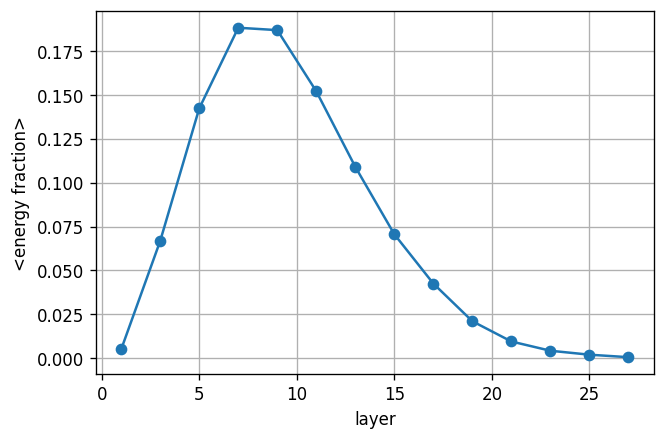

In [81]:
plt.figure(dpi=120)
plt.plot(mean_profile.tc_pt, 'o-')
plt.xlabel('layer')
plt.ylabel('<energy fraction>')
plt.grid()
plt.show()

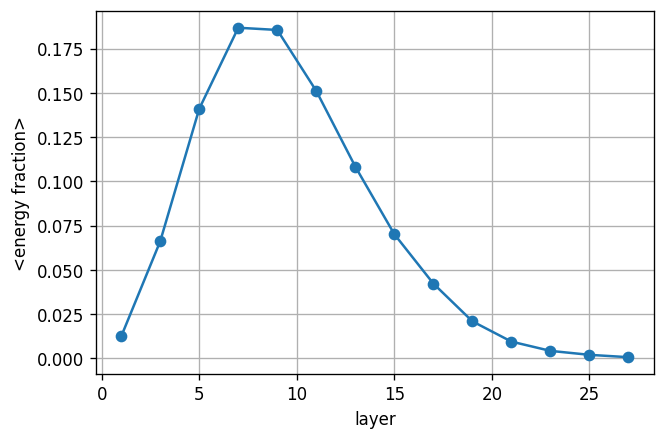

In [79]:
plt.figure(dpi=120)
plt.plot(mean_profile.tc_mipPt, 'o-')
plt.xlabel('layer')
plt.ylabel('<energy fraction>')
plt.grid()
plt.show()